In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
203,31.0,4,91.0,68,1970,17.6,40
360,12.0,8,455.0,225,4951,11.0,49
152,26.4,4,140.0,88,2870,18.1,42
385,13.0,8,350.0,165,4274,12.0,50
71,14.0,8,440.0,215,4312,8.5,52


In [14]:
from sklearn.model_selection import train_test_split
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [15]:
x_train.sample(5)

,horsepower
351,175
45,138
55,83
114,137
93,72


In [18]:
type(x_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(x_train, y_train)

R-square caculated below is a measure of how well the linear model captures the underlying variation in the training data

In [19]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.5888150943861039


In [20]:
y_pred = linear_model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6838690876672968


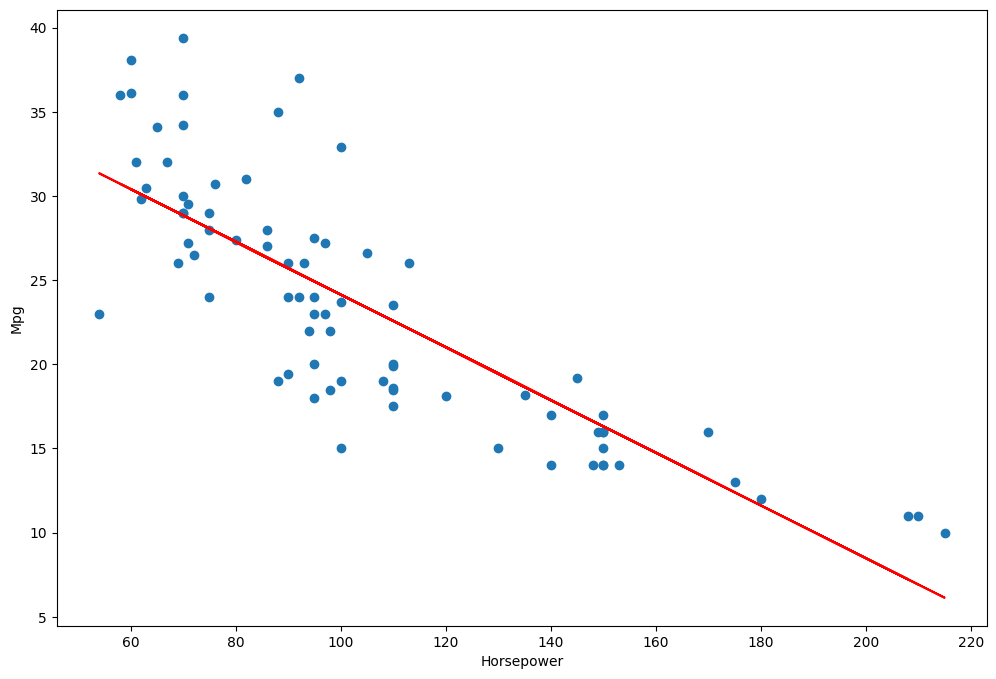

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [23]:
X = automobile_df[['age']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 
linear_model = LinearRegression().fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.35231172389587206
Testing score:  0.2589058928802265


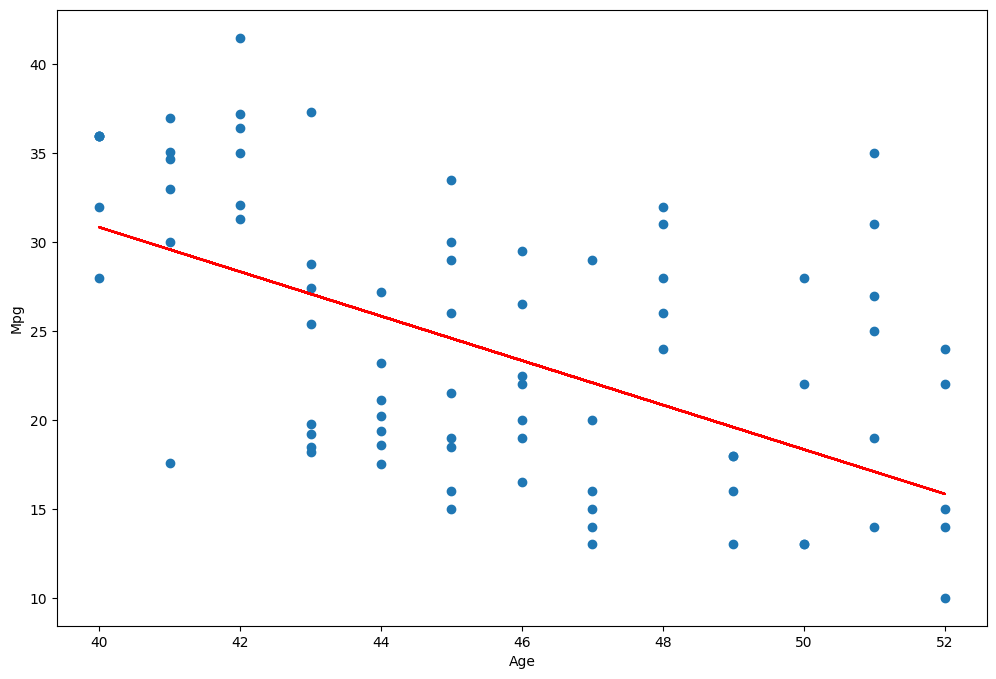

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [32]:
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [33]:
linear_model = LinearRegression().fit(x_train, y_train)

In [34]:
print('Training score: ', linear_model.score(x_train, y_train))


Training score:  0.7026735199458674


In [35]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

cylinders      -0.424446
horsepower     -0.047485
weight         -0.005251
displacement    0.002197
acceleration    0.005499
dtype: float64


In [36]:
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7223383929973015


In [37]:
type(y_pred), type(y_test)

(numpy.ndarray, pandas.core.series.Series)

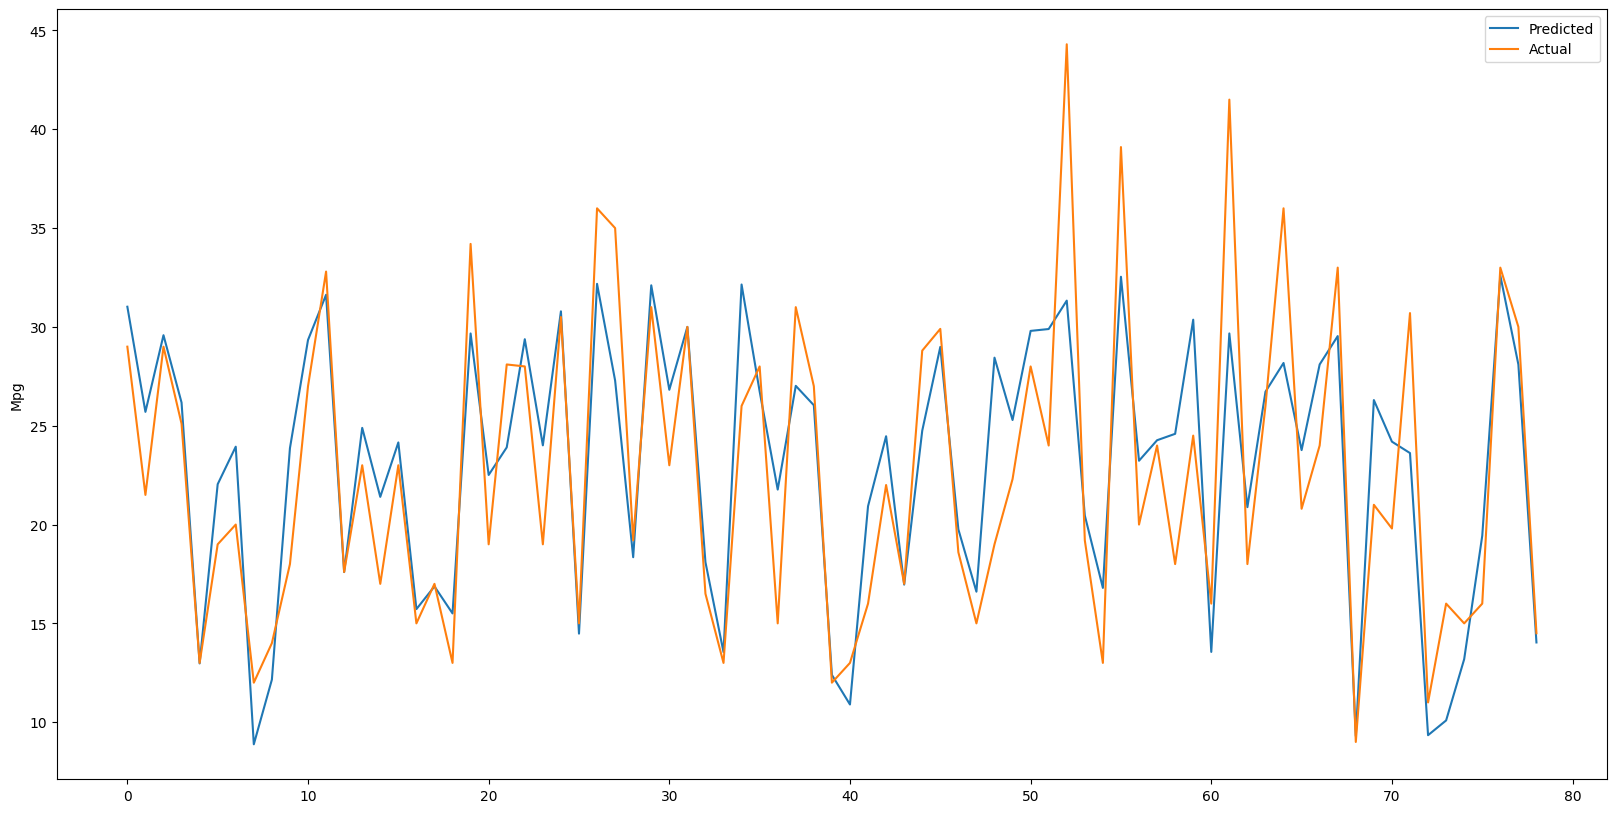

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')
plt.legend()
plt.show()